In [1]:
import json

import pandas as pd
from statsmodels.stats.multitest import fdrcorrection

from utils.permuatation_test import permutation_test
from utils.venn import plot_deg_venn_mono

DEVIATION = 0.2
PRECISION = 2
P_VALUE_THRESHOLD = 0.05


def convert_signal(row):
    deviation = DEVIATION
    significance = P_VALUE_THRESHOLD

    pvalue = row.get("fdr_bh") or row.get("pvalue")
    if pvalue < significance:
        if row["correlation"] > +deviation:
            return 1
        elif row["correlation"] < -deviation:
            return -1
    return 0



In [2]:
tcga_samples = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/data/pancan/anno.tsv",
    sep="\t",
    index_col=0
)
print("TCGA", tcga_samples.size)
print("Nosologies", len(tcga_samples.project.unique()))

with open("./data/pancan/matched_pairs_and_norms.json") as json_f:
    matched_pairs_and_norms = json.load(json_f)

print(f"Matched norms: {len(matched_pairs_and_norms)}")

# significant genes/pathways
print("")
up_genes = pd.read_csv("/home/xvvvx/oncobox/tcga_tumor_normal_match/out/shambala/final_cnrs_up.txt")
down_genes = pd.read_csv("/home/xvvvx/oncobox/tcga_tumor_normal_match/out/shambala/final_cnrs_down.txt")
print(f"genes up:{up_genes.size}/down:{down_genes.size}/total:{up_genes.size + down_genes.size}")
up_pathways = pd.read_csv("/home/xvvvx/oncobox/tcga_tumor_normal_match/out/shambala/final_pals_up.txt")
down_pathways = pd.read_csv("/home/xvvvx/oncobox/tcga_tumor_normal_match/out/shambala/final_pals_down.txt")
print(f"pathways up:{up_pathways.size}/down:{down_pathways.size}/total:{up_pathways.size + down_pathways.size}")

print("")
print("Total genes in study: 36596")
print("Total pathways in study: 2934")

TCGA 44276
Nosologies 34
Matched norms: 716

genes up:1055/down:817/total:1872
pathways up:383/down:177/total:560

Total genes in study: 36596
Total pathways in study: 2934


In [3]:
print("CNR correlations")

cnr_male_inv = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/cnr_correlations(inv)_male.tsv",
    index_col=0, sep="\t"
)
cnr_male_inv_signals = cnr_male_inv.apply(convert_signal, axis=1)
cnr_male_inv_significant = cnr_male_inv[cnr_male_inv_signals == 1]

cnr_female_inv = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/cnr_correlations(inv)_female.tsv",
    index_col=0, sep="\t"
)
cnr_female_inv_signals = cnr_female_inv.apply(convert_signal, axis=1)
cnr_female_inv_significant = cnr_female_inv[cnr_female_inv_signals == 1]

print(
    f"Male mean: {cnr_male_inv.correlation.mean().round(PRECISION)} "
    f"({cnr_male_inv.correlation.min().round(PRECISION)} - {cnr_male_inv.correlation.max().round(PRECISION)})"
)
print(
    f"Significant male cnrs: {cnr_male_inv_significant.shape[0]} "
    f"({cnr_male_inv_significant.shape[0] / cnr_male_inv.shape[0] * 100:.2f}%)"
)

print(
    f"Female mean: {cnr_female_inv.correlation.mean().round(PRECISION)} "
    f"({cnr_female_inv.correlation.min().round(PRECISION)} - {cnr_female_inv.correlation.max().round(PRECISION)})"
)
print(
    f"Significant female cnrs: {cnr_female_inv_significant.shape[0]} "
    f"({cnr_female_inv_significant.shape[0] / cnr_female_inv.shape[0] * 100:.2f}%)"
)
print("")
print("PALS correlations")
pal_male_inv = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/pal_correlations(inv)_male.tsv",
    index_col=0, sep="\t"
)
pal_male_inv_signals = pal_male_inv.apply(convert_signal, axis=1)
pal_male_inv_significant = pal_male_inv[pal_male_inv_signals == 1]

pal_female_inv = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/pal_correlations(inv)_female.tsv",
    index_col=0, sep="\t"
)
pal_female_inv_signals = pal_female_inv.apply(convert_signal, axis=1)
pal_female_inv_significant = pal_female_inv[pal_female_inv_signals == 1]

print(
    f"Male mean: {pal_male_inv.correlation.mean().round(PRECISION)} "
    f"({pal_male_inv.correlation.min().round(PRECISION)} - {pal_male_inv.correlation.max().round(PRECISION)})"
)
print(
    f"Significant male pals: {pal_male_inv_significant.shape[0]} "
    f"({pal_male_inv_significant.shape[0] / pal_male_inv.shape[0] * 100:.2f}%)"
)

print(
    f"Female mean: {pal_female_inv.correlation.mean().round(PRECISION)} "
    f"({pal_female_inv.correlation.min().round(PRECISION)} - {pal_female_inv.correlation.max().round(PRECISION)})"
)
print(
    f"Significant female pals: {pal_female_inv_significant.shape[0]} "
    f"({pal_female_inv_significant.shape[0] / pal_female_inv.shape[0] * 100:.2f}%)"
)

print("")
print(
    f"TOTAL: males: "
    f"{(cnr_male_inv_significant.shape[0] + pal_male_inv_significant.shape[0]) / (cnr_male_inv.shape[0] + pal_male_inv.shape[0]) * 100:.2f}%"
)
print(
    f"TOTAL: females: "
    f"{(cnr_female_inv_significant.shape[0] + pal_female_inv_significant.shape[0]) / (cnr_female_inv.shape[0] + pal_female_inv.shape[0]) * 100:.2f}%"
)
print("")

CNR correlations
Male mean: 0.15 (-0.1 - 0.91)
Significant male cnrs: 4790 (23.36%)
Female mean: 0.16 (-0.1 - 0.87)
Significant female cnrs: 5484 (26.75%)

PALS correlations
Male mean: 0.1 (-0.05 - 0.35)
Significant male pals: 88 (5.39%)
Female mean: 0.14 (-0.06 - 0.35)
Significant female pals: 309 (18.91%)

TOTAL: males: 22.04%
TOTAL: females: 26.17%



In [4]:
print("Samples correlations by cnr")

cnr_male = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/cnr_correlations_male.tsv",
    index_col=0, sep="\t"
)
cnr_male["fdr_bh"] = fdrcorrection(cnr_male["pvalue"])[1]
cnr_male_significant = cnr_male[(cnr_male.correlation.abs() > DEVIATION) & (cnr_male.fdr_bh < 0.05)]

cnr_female = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/cnr_correlations_female.tsv",
    index_col=0, sep="\t"
)
cnr_female["fdr_bh"] = fdrcorrection(cnr_female["pvalue"])[1]
cnr_female_significant = cnr_female[(cnr_female.correlation.abs() > DEVIATION) & (cnr_female.fdr_bh < 0.05)]

print(
    f"Male mean: {cnr_male.correlation.mean().round(PRECISION)} "
    f"({cnr_male.correlation.min().round(PRECISION)} - {cnr_male.correlation.max().round(PRECISION):.2f})"
)
print(
    f"Significant male cnrs: {cnr_male_significant.shape[0]}"
    f"({cnr_male_significant.shape[0] / cnr_male.shape[0] * 100:.2f}%)"
)

print(
    f"Female mean: {cnr_female.correlation.mean().round(PRECISION)} "
    f"({cnr_female.correlation.min().round(PRECISION)} - {cnr_female.correlation.max().round(PRECISION):.2f})"
)
print(
    f"Significant female cnrs: {cnr_female_significant.shape[0]}"
    f"({cnr_female_significant.shape[0] / cnr_female.shape[0] * 100:.2f}%)"
)

print("")
print("Samples correlations by PALs")
pal_male = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/pal_correlations_male.tsv",
    index_col=0, sep="\t"
)
pal_male["fdr_bh"] = fdrcorrection(pal_male["pvalue"])[1]
pal_male_signals = pal_male.apply(convert_signal, axis=1)
pal_male_significant = pal_male[pal_male_signals == 1]

pal_female = pd.read_csv(
    "/home/xvvvx/oncobox/tcga_tumor_normal_match/out/pancan/pal_correlations_female.tsv",
    index_col=0, sep="\t"
)
pal_female["fdr_bh"] = fdrcorrection(pal_female["pvalue"])[1]
pal_female_significant = pal_female[(pal_female.correlation.abs() > DEVIATION) & (pal_female.fdr_bh < 0.05)]
# cnr_male = cnr_male[cnr_male.pvalue <= 0.05]
# cnr_female = cnr_female[cnr_female.pvalue <= 0.05]
print(
    f"Male mean: {pal_male.correlation.mean().round(PRECISION)} "
    f"({pal_male.correlation.min().round(PRECISION)} - {pal_male.correlation.max().round(PRECISION)})"
)
print(
    f"Significant male pals: {pal_male_significant.shape[0]}"
    f"({pal_male_significant.shape[0] / pal_male.shape[0] * 100:.2f}%)")

print(
    f"Female mean: {pal_female.correlation.mean().round(PRECISION)} "
    f"({pal_female.correlation.min().round(PRECISION)} - {pal_female.correlation.max().round(PRECISION)})"
)
print(
    f"Significant female pals: {pal_female_significant.shape[0]}"
    f"({pal_female_significant.shape[0] / pal_female.shape[0] * 100:.2f}%)")

print("")
print(
    f"TOTAL: males: "
    f"{(cnr_male_significant.shape[0] + pal_male_significant.shape[0]) / (cnr_male.shape[0] + pal_male.shape[0]) * 100:.2f}%"
)
print(
    f"TOTAL: females: "
    f"{(cnr_female_significant.shape[0] + pal_female_significant.shape[0]) / (cnr_female.shape[0] + pal_female.shape[0]) * 100:.2f}%"
)



Samples correlations by cnr
Male mean: 0.11 (-0.34 - 0.89)
Significant male cnrs: 108(31.21%)
Female mean: 0.11 (-0.28 - 0.83)
Significant female cnrs: 105(28.85%)

Samples correlations by PALs
Male mean: 0.08 (-0.63 - 0.98)
Significant male pals: 116(33.53%)
Female mean: 0.08 (-0.57 - 0.94)
Significant female pals: 184(50.55%)

TOTAL: males: 32.37%
TOTAL: females: 39.70%


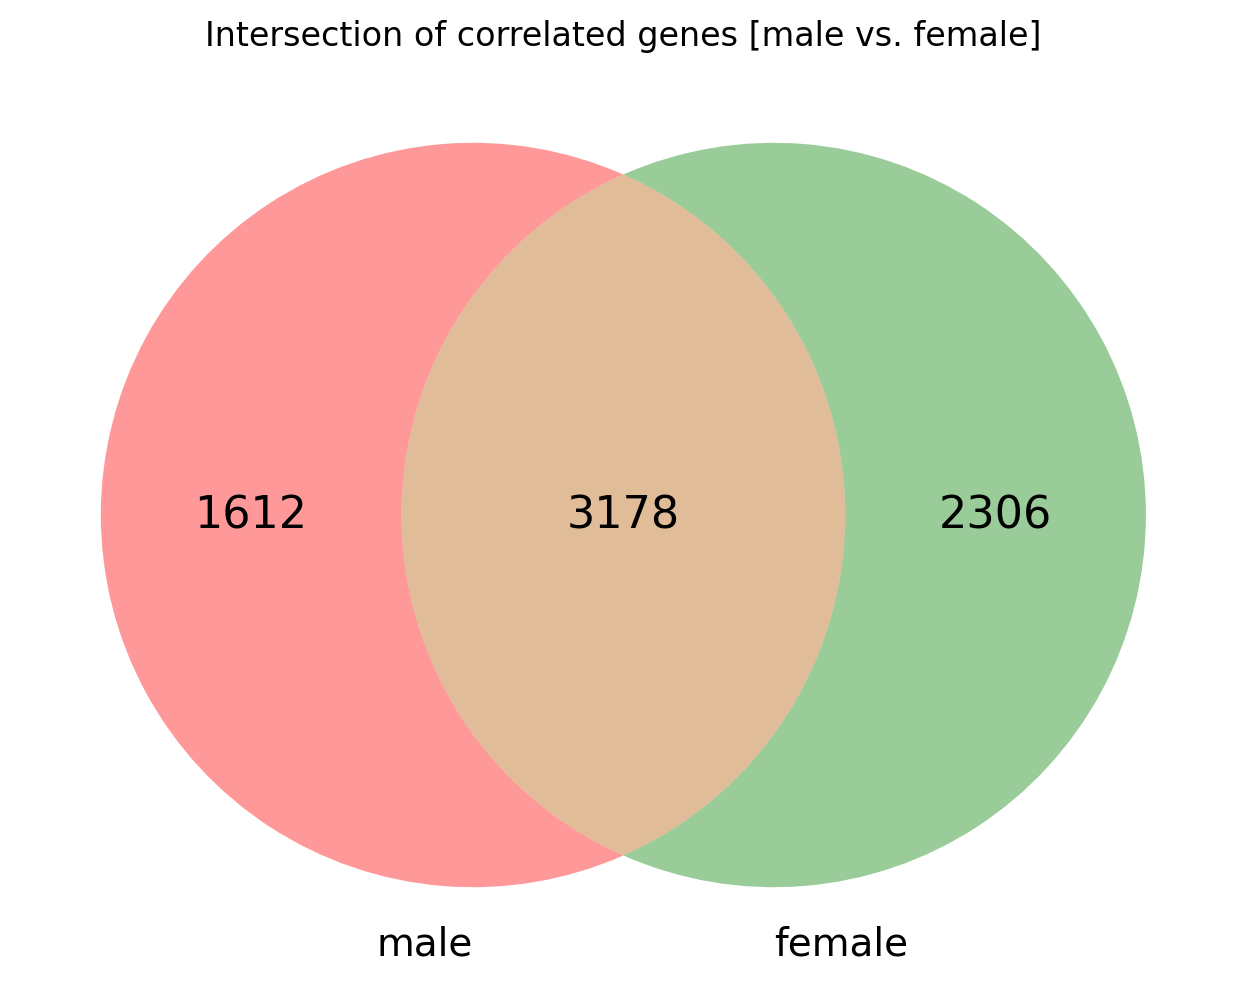

Permutation test [genes]: 100%|██████████| 10000/10000 [00:13<00:00, 717.99it/s]


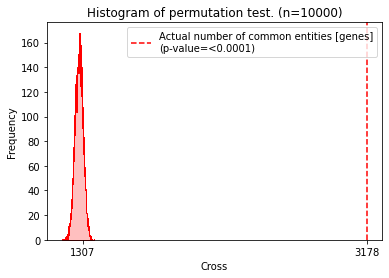

In [5]:
significant_genes_merged = pd.concat([
    cnr_male_inv_signals,
    cnr_female_inv_signals,
], axis=1)
significant_genes_merged.columns = ["male", "female"]

plot_deg_venn_mono(significant_genes_merged, title="Intersection of correlated genes [male vs. female]")

_ = permutation_test(
    significant_genes_merged,
    [1, ],
    value_labels={
        1: "genes"
    },
    value_colors={
        1: "red",
    },
    show_plot=True
)


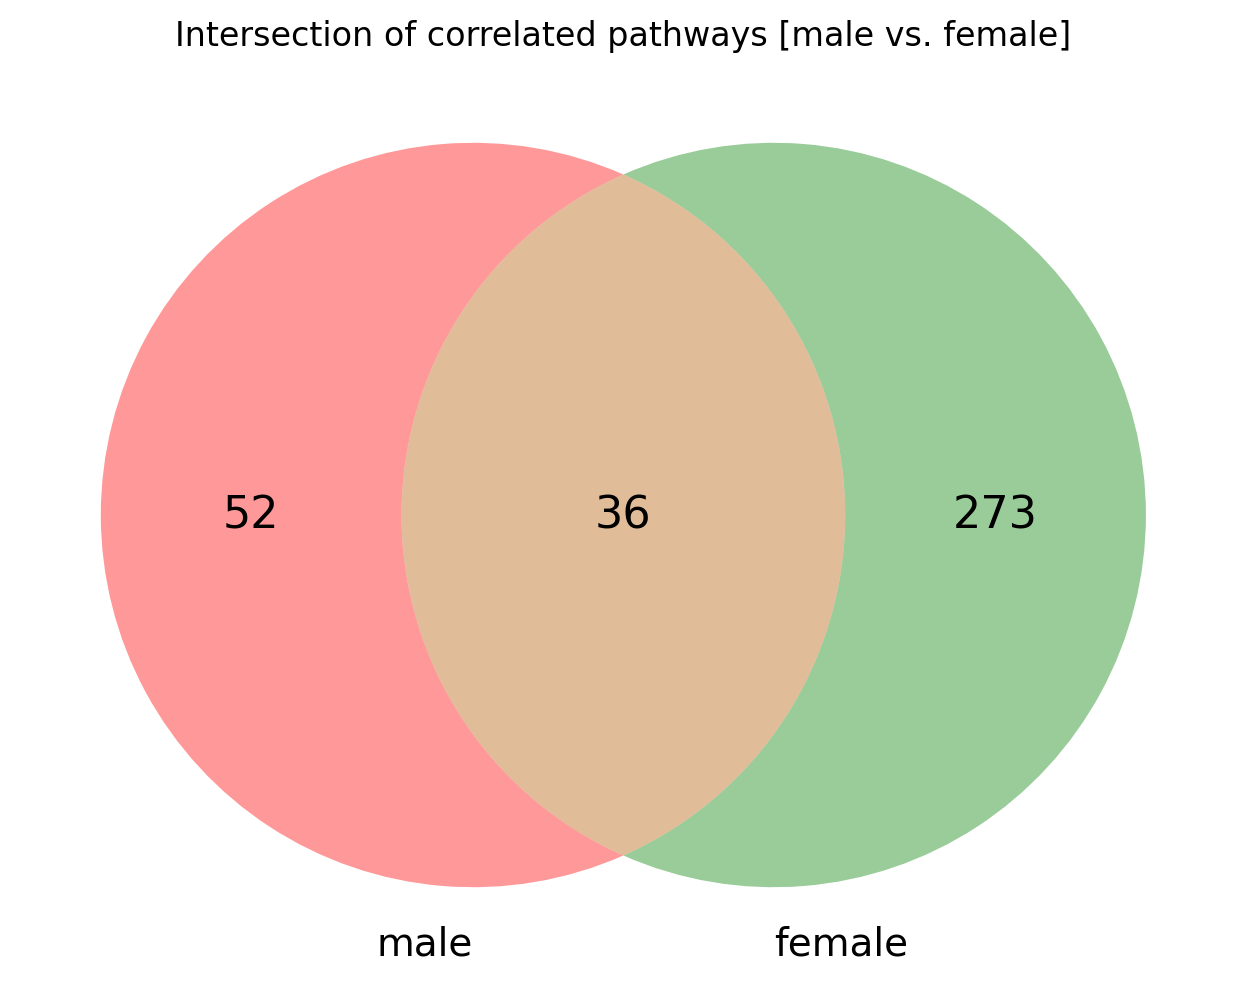

Permutation test [pathways]: 100%|██████████| 10000/10000 [00:01<00:00, 9158.76it/s]


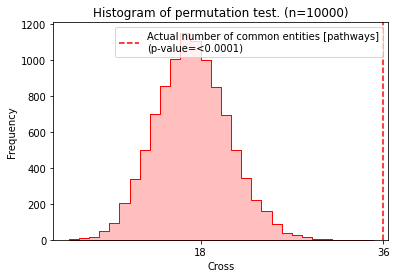

In [6]:
significant_pals_merged = pd.concat([
    pal_male_inv_signals,
    pal_female_inv_signals,
], axis=1)
significant_pals_merged.columns = ["male", "female"]

plot_deg_venn_mono(significant_pals_merged, title="Intersection of correlated pathways [male vs. female]")

_ = permutation_test(
    significant_pals_merged,
    [1, ],
    value_labels={
        1: "pathways"
    },
    value_colors={
        1: "red",
    },
    show_plot=True
)

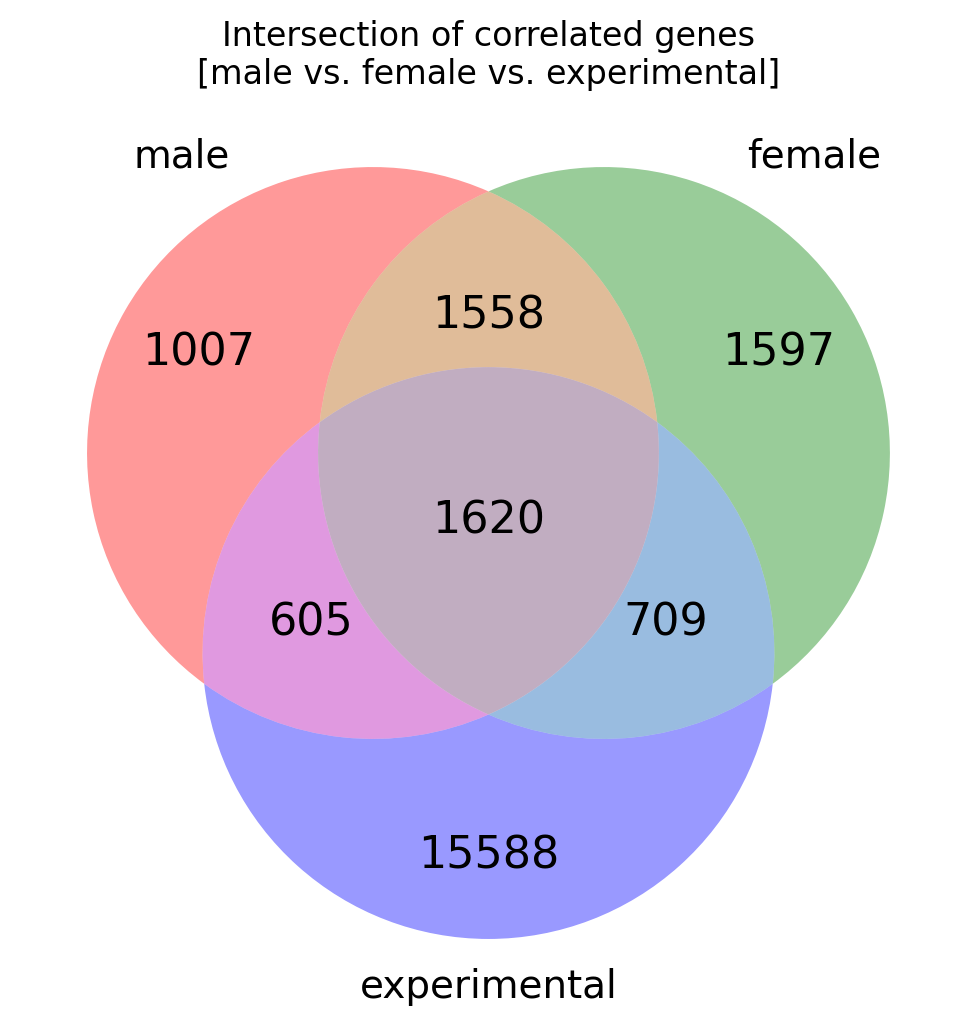

Permutation test [genes]: 100%|██████████| 10000/10000 [00:31<00:00, 316.40it/s]


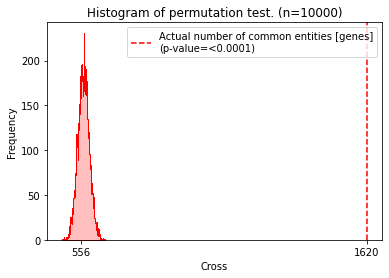

In [7]:
experimental_cnr_inv = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/out/experimental/cnr_correlations(inv).tsv",
    sep="\t",
    index_col=0
)
experimental_cnr_inv_signals = experimental_cnr_inv.apply(convert_signal, axis=1)
experimental_cnr_inv_significant = experimental_cnr_inv[experimental_cnr_inv_signals == 1]

all_cnr_inv_signals_merged = pd.concat([
    significant_genes_merged,
    experimental_cnr_inv_signals
], axis=1)
all_cnr_inv_signals_merged.columns = [*significant_genes_merged.columns, "experimental"]
plot_deg_venn_mono(all_cnr_inv_signals_merged, title="Intersection of correlated genes\n[male vs. female vs. experimental]")
triple_intersected_genes = permutation_test(
    all_cnr_inv_signals_merged,
    [1, ],
    value_labels={
        1: "genes"
    },
    value_colors={
        1: "red",
    },
    show_plot=True
)


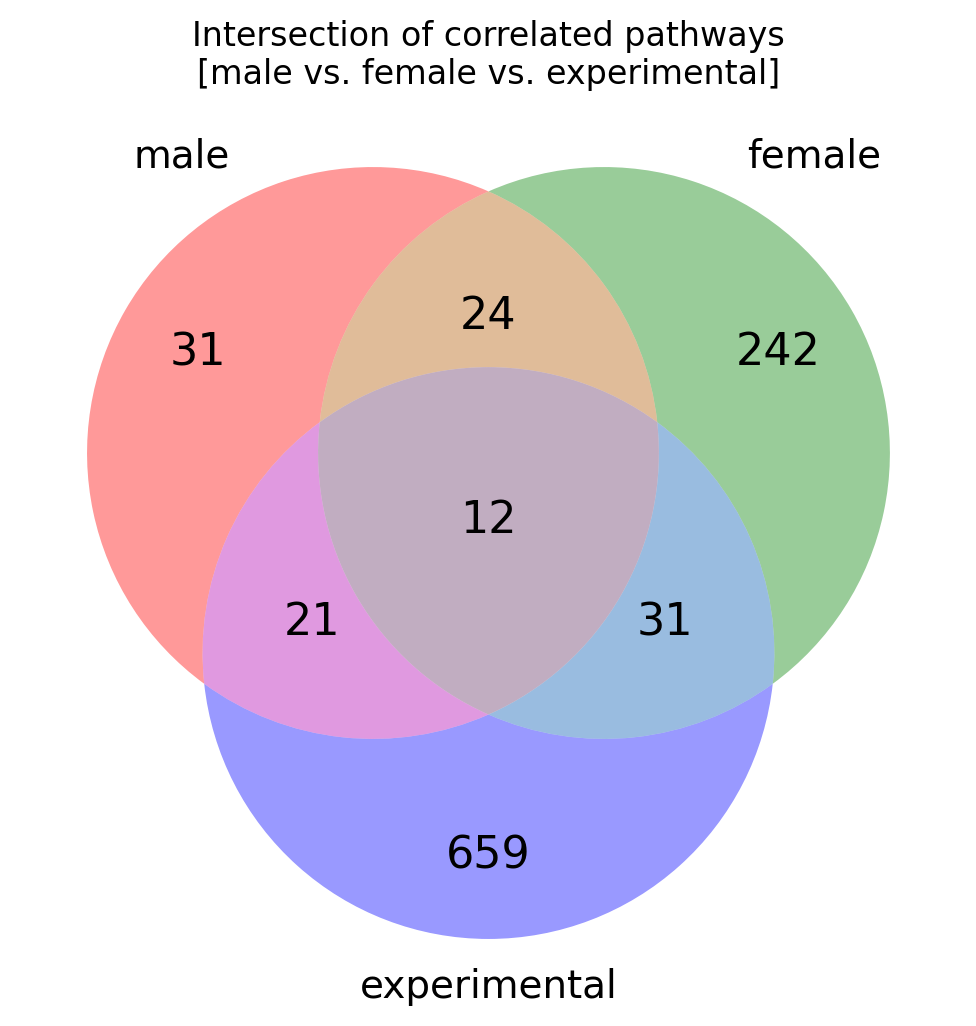

Permutation test [pathways]: 100%|██████████| 10000/10000 [00:01<00:00, 5114.86it/s]


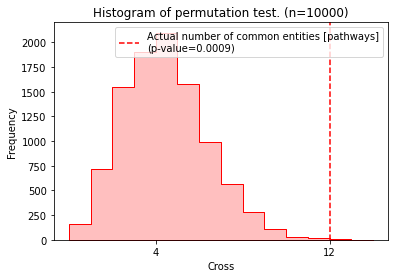

In [8]:
experimental_pal_inv = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/out/experimental/pal_correlations(inv).tsv",
    sep="\t",
    index_col=0
)
experimental_pal_inv_signals = experimental_pal_inv.apply(convert_signal, axis=1)
experimental_pal_inv_significant = experimental_pal_inv[experimental_pal_inv_signals == 1]

all_pals_inv__signals_merged = pd.concat([
    significant_pals_merged,
    experimental_pal_inv_signals,
], axis=1)
all_pals_inv__signals_merged.columns = [*significant_pals_merged.columns, "experimental"]
plot_deg_venn_mono(all_pals_inv__signals_merged, title="Intersection of correlated pathways\n[male vs. female vs. experimental]")
_ = permutation_test(
    all_pals_inv__signals_merged,
    [1, ],
    value_labels={
        1: "pathways"
    },
    value_colors={
        1: "red",
    },
    show_plot=True
)

                male    female  experimental
SYMBOL                                      
GSTM1       0.912271  0.871756      0.904762
RPS28       0.864286  0.842123      0.976190
RPL9        0.840469  0.811865      0.976190
ERAP2       0.786726  0.780258      0.809524
FKBP1AP1    0.700737  0.651064      1.000000
GSTT2       0.706589  0.662118      0.904762
POMZP3      0.698324  0.730579      0.785714
XRRA1       0.721818  0.588755      0.904762
POM121L10P  0.597120  0.580193      0.928571
CTAG2       0.470516  0.711537      0.952381


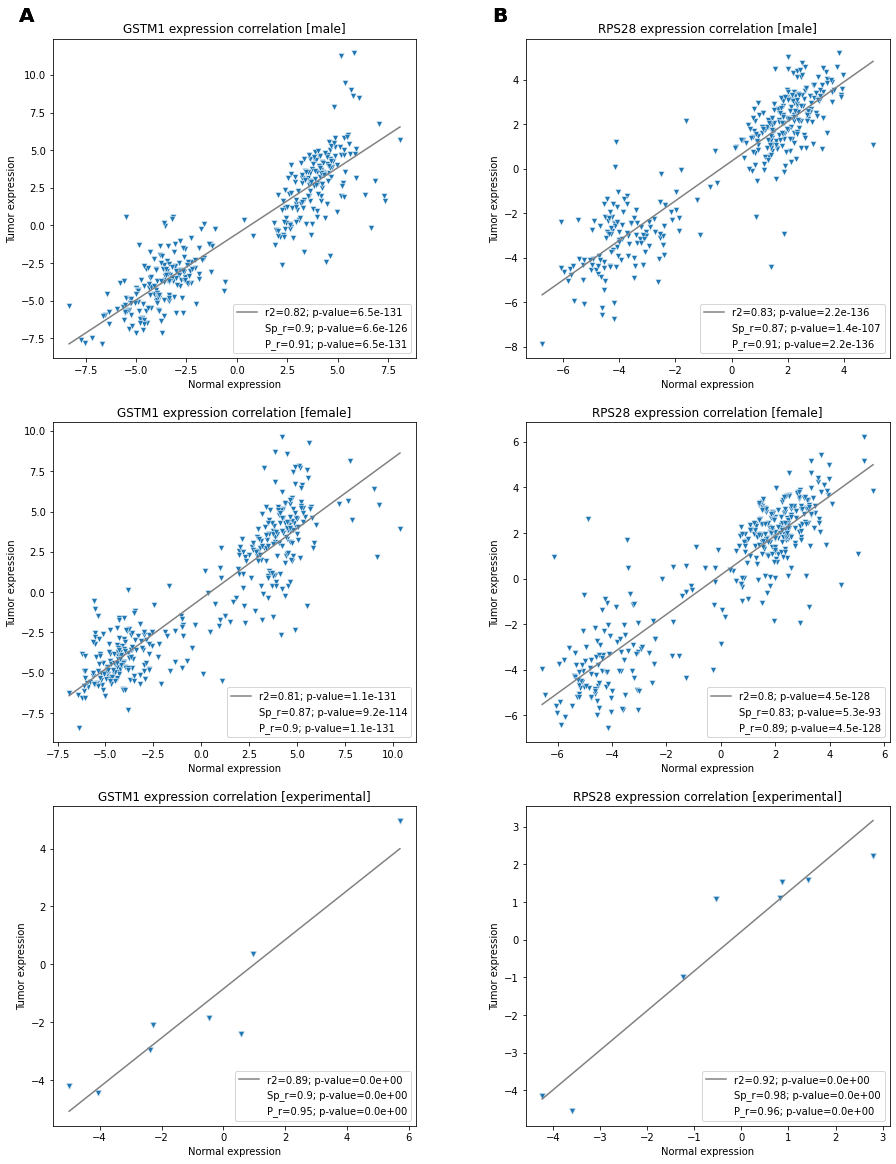

In [9]:

from matplotlib import pyplot as plt
from projects.tcga_tumor_normal_match.prj_utils.plot_scatter_psr2 import plot_scatter_psr2
from scipy.stats import gmean

all_cnr_inv_merged = pd.concat([
    cnr_male_inv_significant["correlation"],
    cnr_female_inv_significant["correlation"],
    experimental_cnr_inv_significant["correlation"]
], axis=1).dropna()
all_cnr_inv_merged.columns = ["male", "female", "experimental"]
mean_correlations = all_cnr_inv_merged.apply(gmean, axis=1).sort_values(ascending=False)[:10]
print(all_cnr_inv_merged.filter(mean_correlations.index, axis=0))

pancan_cnrs = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/out/pancan/cnrs.tsv",
    sep="\t",
    index_col=0
)

pancan_anno = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/data/pancan/anno.tsv",
    sep="\t",
    index_col=0
).filter(pancan_cnrs.columns, axis=0)

experimental_cnrs = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/out/experimental/cnrs.tsv",
    sep="\t",
    index_col=0
)

experimental_anno = pd.read_csv(
    "/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/data/experimental/anno.tsv",
    sep="\t",
    index_col=0
)

_, axs = plt.subplots(3, 2, figsize=(15, 20))
plt.subplots_adjust(wspace=.3, hspace=.2)

for gene_i, gene in enumerate(mean_correlations[:2].index):
    gene_expressions = pancan_cnrs.filter([gene], axis=0)

    samples_data = list()

    for patient in pancan_anno.patient.unique():
        patient_anno = pancan_anno[pancan_anno.patient == patient]
        nosology = patient_anno.iloc[0].project
        gender = patient_anno.iloc[0].gender

        tumor_expressions = gene_expressions.filter(
            patient_anno[patient_anno.tumor_status == "Tumor"].index
        )
        normal_expressions = gene_expressions.filter(
            patient_anno[patient_anno.tumor_status == "Normal"].index
        )
        if tumor_expressions.empty or normal_expressions.empty: continue
        samples_data.append(
            {
                "Normal expression": normal_expressions.values[0].mean(),
                "Tumor expression": tumor_expressions.values[0].mean(),
                "Nosology": nosology,
                "Group": gender
            }
        )
        for sample_name in experimental_anno.index:
            tumor_expression = experimental_cnrs[sample_name][gene]
            matched_norm_id = experimental_anno["matched_norm"][sample_name]
            normal_expression = experimental_cnrs[matched_norm_id][gene]

            samples_data.append(
                {
                    "Normal expression": normal_expression,
                    "Tumor expression": tumor_expression,
                    "Nosology": experimental_anno.tissue[sample_name],
                    "Group": "experimental"
                }
            )

    df = pd.DataFrame(samples_data)
    for group_i, group in enumerate(["male", "female", "experimental"]):
        curr_ax = axs[group_i][gene_i]
        curr_df = df[df.Group == group]
        plot_scatter_psr2(
            curr_df,
            x="Normal expression",
            y="Tumor expression",
            title=f"{gene} expression correlation [{group}]",
            # hue="Nosology",
            ax=curr_ax
        )
    for letter_i, letter in enumerate(["A", "B"]):
        ax = axs[0][letter_i]
        ax.text(
            -0.05, 1.1, letter, transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right'
        )


In [24]:
drugs_db = pd.read_excel("/home/xvvvx/src/rna_tool/projects/tcga_tumor_normal_match/data/drugs_db_Oncobox woit_4.2.xlsx", index_col=0)
drugs_db.Targets = drugs_db.Targets.apply(lambda x: x.split(", "))

target_genes = triple_intersected_genes[1]["intersection"]

gene_drug_pairs = list()

for gene in target_genes:
    for drug_name, linked_genes in drugs_db.Targets.items():
        if gene in linked_genes:
            gene_drug_pairs.append(
                (gene, drug_name)
            )


print(gene_drug_pairs)


[('TNF', 'Pomalidomide'), ('TNF', 'Thalidomide'), ('MAP2K2', 'Binimetinib (MEK162)'), ('MAP2K2', 'Selumetinib'), ('MAP2K2', 'Trametinib (Mekinst)'), ('PIK3CA', 'Alpelisib'), ('PIK3CA', 'Copanlisib')]


In [28]:
pals_correlations = pd.concat([
    pal_male_inv_significant["correlation"],
    pal_female_inv_significant["correlation"],
    experimental_pal_inv_significant["correlation"]
], axis=1).dropna()
pals_correlations.columns = ["male", "female", "experimental"]
mean_pal_correlations = pals_correlations.apply(gmean, axis=1).sort_values(ascending=False)
sorted_pals = pals_correlations.filter(mean_pal_correlations.index, axis=0)
# sorted_pals.to_csv("/tmp/sorted_pals.tsv", sep="\t")
print(sorted_pals.round(2))

                                                    male  female  experimental
pathway                                                                       
KEGG_Circadian_rhythm_Main_Pathway                  0.31    0.25          0.74
KEGG_Glutathione_metabolism_Main_Pathway            0.26    0.25          0.90
reactome_Synthesis_of_PIPs_at_the_early_endosom...  0.24    0.26          0.83
reactome_p38MAPK_events_Main_Pathway                0.23    0.26          0.74
guanosine_nucleotides_ide_novoi_biosynthesis        0.20    0.23          0.95
reactome_Synthesis_of_Leukotrienes_LT_and_Eoxin...  0.24    0.23          0.71
KEGG_RNA_polymerase_Main_Pathway                    0.22    0.23          0.71
Circadian_Pathway                                   0.22    0.22          0.76
guanosine_deoxyribonucleotides_ide_novoi_biosyn...  0.21    0.20          0.86
pyrimidine_deoxyribonucleotides_ide_novoi_biosy...  0.23    0.20          0.74
NCI_Notch_mediated_HES_HEY_network_Main_Pathway     